In [ ]:
# Notebooks/analyze-artifact-data.ipynb

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Update the path to match your environment
csv_file = "Data/processed/artifact_data.csv"
df = pd.read_csv(csv_file)

df.head()

,image_tag,language,failed_commit,passed_commit,time_to_fix_hours,exceptions
0,gwtbootstrap3-gwtbootstrap3-49499229,Java,2015-02-04T19:16:29Z,2015-02-04T19:19:21Z,0.047778,NaN
1,hivesolutions-appier-142245649,Python,2016-07-04T15:55:25Z,2016-07-04T16:01:17Z,0.097778,AttributeError
2,raphw-byte-buddy-187606480,Java,2016-12-30T02:05:15Z,2016-12-30T02:11:28Z,0.103611,NaN
3,raphw-byte-buddy-134153784,Java,2016-05-31T12:41:32Z,2016-05-31T12:52:05Z,0.175833,WantedButNotInvoked
4,hivesolutions-appier-134166438,Python,2016-05-31T13:33:38Z,2016-05-31T13:34:26Z,0.013333,ImportError


In [3]:
# Check the shape, info, and basic statistics
print("Shape of the DataFrame:", df.shape)
df.info()
display(df.describe(include='all'))

Shape of the DataFrame: (442, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   image_tag          442 non-null    object 
 1   language           442 non-null    object 
 2   failed_commit      442 non-null    object 
 3   passed_commit      439 non-null    object 
 4   time_to_fix_hours  439 non-null    float64
 5   exceptions         206 non-null    object 
dtypes: float64(1), object(5)
memory usage: 20.8+ KB


,image_tag,language,failed_commit,passed_commit,time_to_fix_hours,exceptions
count,442,442,442,439,439.000000,206
unique,442,2,285,284,NaN,46
top,gwtbootstrap3-gwtbootstrap3-49499229,Java,2016-12-26T12:34:50Z,2016-12-26T13:10:32Z,NaN,AssertionError
freq,1,326,7,7,NaN,74
mean,NaN,NaN,NaN,NaN,12.490851,NaN
std,NaN,NaN,NaN,NaN,65.220146,NaN
min,NaN,NaN,NaN,NaN,-64.603889,NaN
25%,NaN,NaN,NaN,NaN,0.086944,NaN
50%,NaN,NaN,NaN,NaN,0.219444,NaN
75%,NaN,NaN,NaN,NaN,1.129722,NaN


In [4]:
# Count missing values in each column
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
image_tag              0
language               0
failed_commit          0
passed_commit          3
time_to_fix_hours      3
exceptions           236
dtype: int64


Artifacts per language:
language
Java      326
Python    116
Name: count, dtype: int64


/var/folders/_5/3w8pz5d56fb63_28f4qn20900000gn/T/ipykernel_61099/3373112137.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=language_counts.index, y=language_counts.values, palette="viridis")


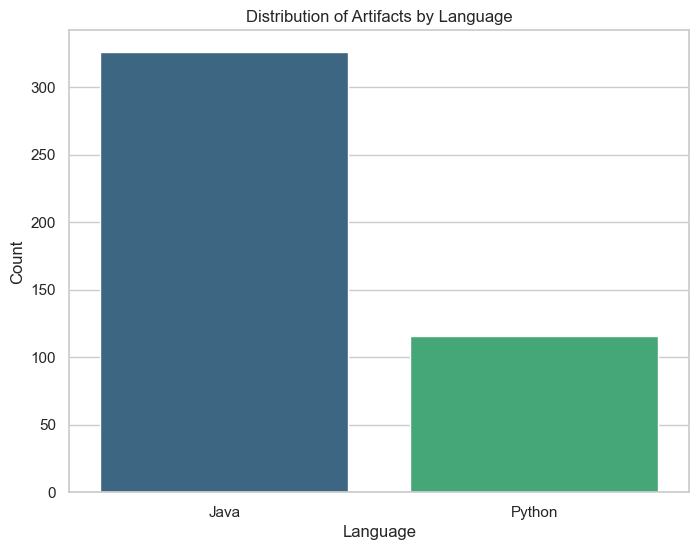

In [5]:
# Count and visualize the frequency of artifacts per language
language_counts = df['language'].value_counts()
print("Artifacts per language:")
print(language_counts)

plt.figure(figsize=(8, 6))
sns.barplot(x=language_counts.index, y=language_counts.values, palette="viridis")
plt.title("Distribution of Artifacts by Language")
plt.xlabel("Language")
plt.ylabel("Count")
plt.show()

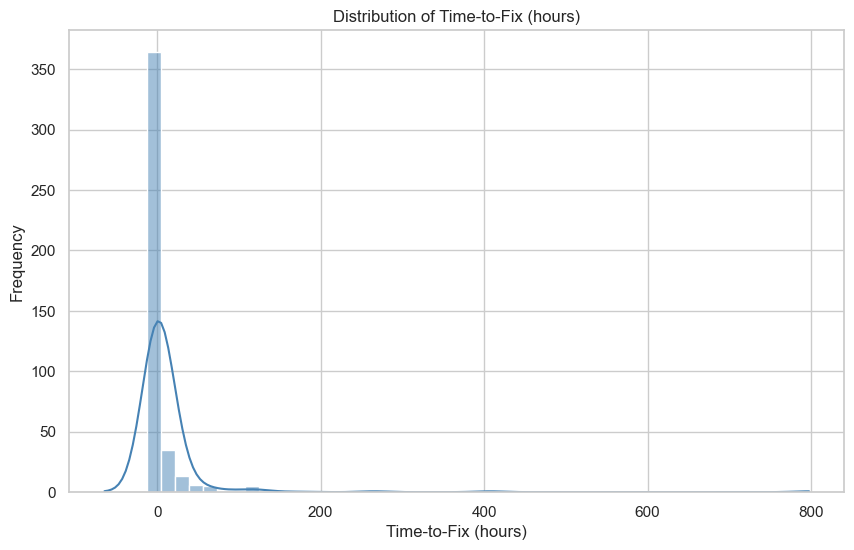

In [ ]:
# Plot the distribution of time_to_fix_hours
plt.figure(figsize=(10, 6))
sns.histplot(df['time_to_fix_hours'].dropna(), bins=50, kde=True, color='steelblue')
plt.title("Distribution of Time-to-Fix (hours)")
plt.xlabel("Time-to-Fix (hours)")
plt.ylabel("Frequency")
plt.show()

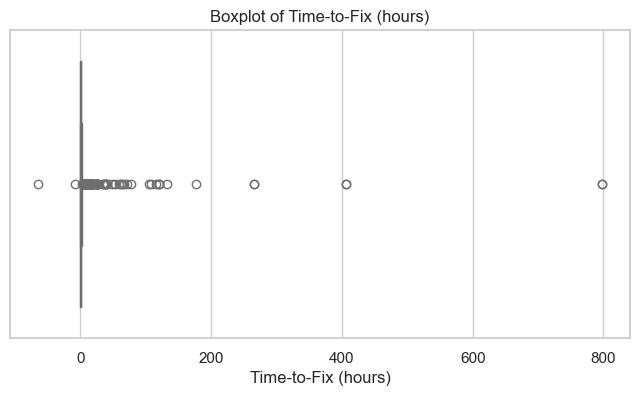

In [7]:
# Create a box plot to visualize outliers in time_to_fix_hours
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['time_to_fix_hours'].dropna(), color='lightcoral')
plt.title("Boxplot of Time-to-Fix (hours)")
plt.xlabel("Time-to-Fix (hours)")
plt.show()

Average Time-to-Fix by Language:
  language  time_to_fix_hours
0     Java          15.876313
1   Python           3.064090


/var/folders/_5/3w8pz5d56fb63_28f4qn20900000gn/T/ipykernel_61099/3232172172.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='language', y='time_to_fix_hours', data=avg_time_by_lang, palette="magma")


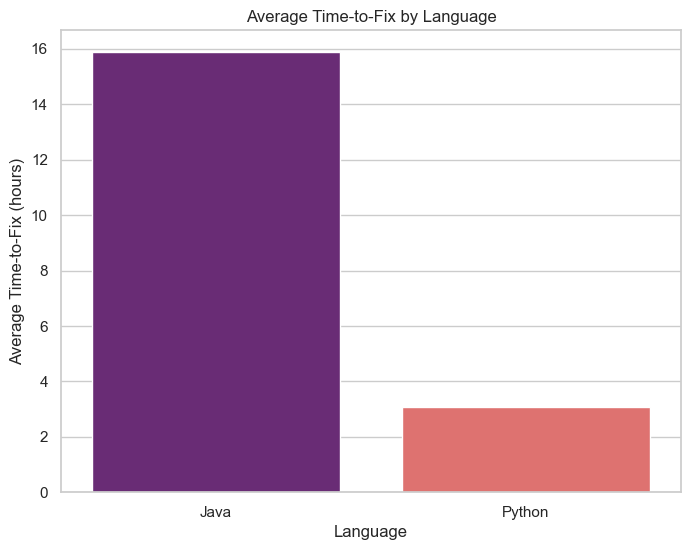

In [8]:
# Compute the average time-to-fix per language
avg_time_by_lang = df.groupby('language')['time_to_fix_hours'].mean().reset_index()
print("Average Time-to-Fix by Language:")
print(avg_time_by_lang)

plt.figure(figsize=(8, 6))
sns.barplot(x='language', y='time_to_fix_hours', data=avg_time_by_lang, palette="magma")
plt.title("Average Time-to-Fix by Language")
plt.xlabel("Language")
plt.ylabel("Average Time-to-Fix (hours)")
plt.show()

Top Exceptions:
exceptions_list
AssertionError          92
NullPointerException    20
AttributeError          17
ImportError             12
TypeError               12
FileNotFoundError        9
SyntaxError              8
WantedButNotInvoked      7
RuntimeError             6
ComparisonFailure        5
Name: count, dtype: int64


/var/folders/_5/3w8pz5d56fb63_28f4qn20900000gn/T/ipykernel_61099/2729930561.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=exceptions_counts.index[:10], y=exceptions_counts.values[:10], palette="coolwarm")


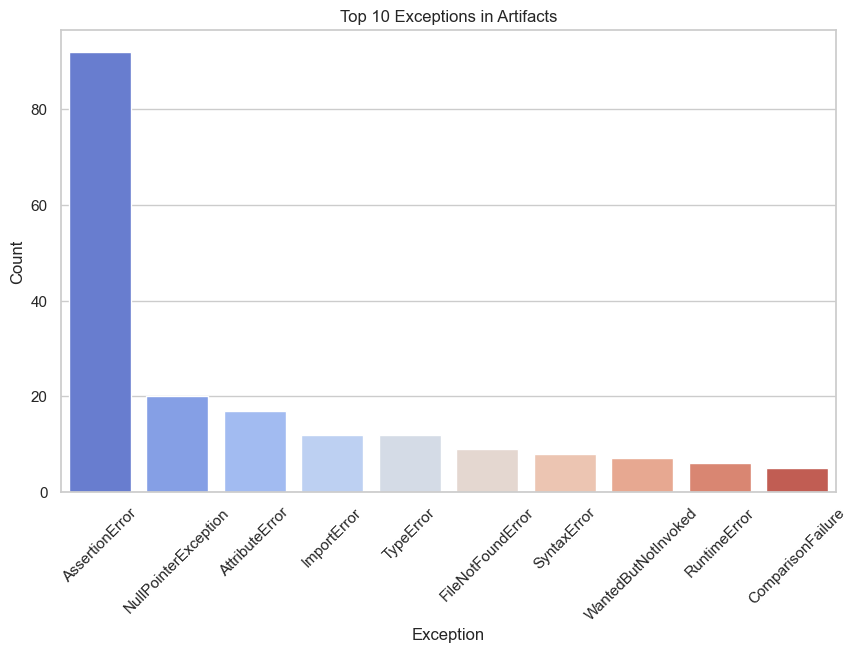

In [ ]:
# Define a function to split the semicolon-separated exceptions string into a list
def split_exceptions(ex_str):
    if pd.isnull(ex_str) or ex_str == "":
        return []
    return [ex.strip() for ex in ex_str.split(";")]

# Apply the function to create a new column 'exceptions_list'
df['exceptions_list'] = df['exceptions'].apply(split_exceptions)

# Explode the list to create one row per exception (for counting)
exceptions_exploded = df.explode('exceptions_list')

# Count frequency of each exception
exceptions_counts = exceptions_exploded['exceptions_list'].value_counts()
print("Top Exceptions:")
print(exceptions_counts.head(10))

plt.figure(figsize=(10, 6))
sns.barplot(x=exceptions_counts.index[:10], y=exceptions_counts.values[:10], palette="coolwarm")
plt.title("Top 10 Exceptions in Artifacts")
plt.xlabel("Exception")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [10]:
# Calculate basic statistics for time_to_fix_hours for outlier detection
mean_time = df['time_to_fix_hours'].mean()
std_time = df['time_to_fix_hours'].std()
threshold = mean_time + 3 * std_time

print(f"Mean Time-to-Fix: {mean_time:.2f} hours")
print(f"Standard Deviation: {std_time:.2f} hours")
print(f"Outlier Threshold (mean + 3*std): {threshold:.2f} hours")

# Identify outlier artifacts
outliers = df[df['time_to_fix_hours'] > threshold]
print("Number of outliers:", outliers.shape[0])
display(outliers[['image_tag', 'time_to_fix_hours', 'language']].head())

Mean Time-to-Fix: 12.49 hours
Standard Deviation: 65.22 hours
Outlier Threshold (mean + 3*std): 208.15 hours
Number of outliers: 6


,image_tag,time_to_fix_hours,language
38,kairosdb-kairosdb-194637034,797.479722,Java
64,kairosdb-kairosdb-160772309,406.670000,Java
152,kairosdb-kairosdb-160772310,406.670000,Java
230,kairosdb-kairosdb-242004441,265.537778,Java
323,kairosdb-kairosdb-242004442,265.537778,Java


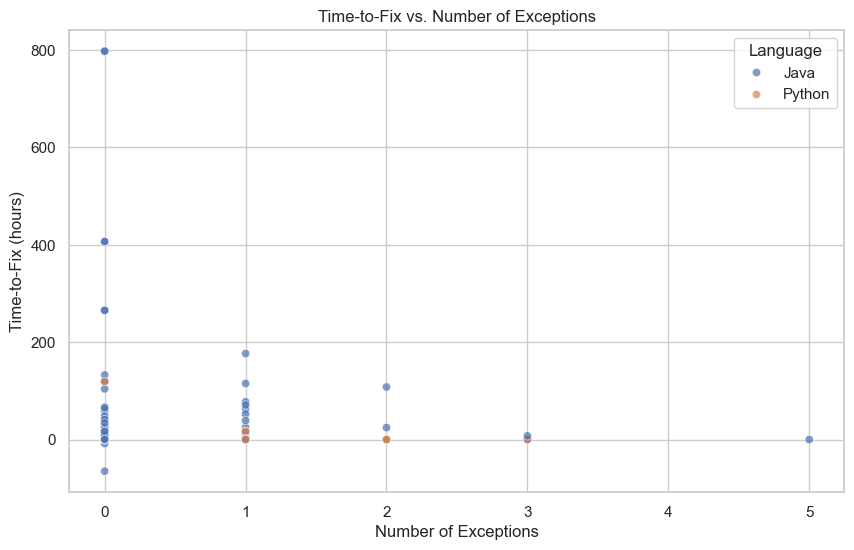

In [11]:
# Create a column that counts the number of exceptions per artifact
df['num_exceptions'] = df['exceptions_list'].apply(len)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='num_exceptions', y='time_to_fix_hours', data=df, hue='language', palette="deep", alpha=0.7)
plt.title("Time-to-Fix vs. Number of Exceptions")
plt.xlabel("Number of Exceptions")
plt.ylabel("Time-to-Fix (hours)")
plt.legend(title="Language")
plt.show()